# Project 7
## Author: Sarah Howard
### Github Repository:  https://github.com/sapapesh/datafun-07-ml

In [38]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

### Linear Relationships

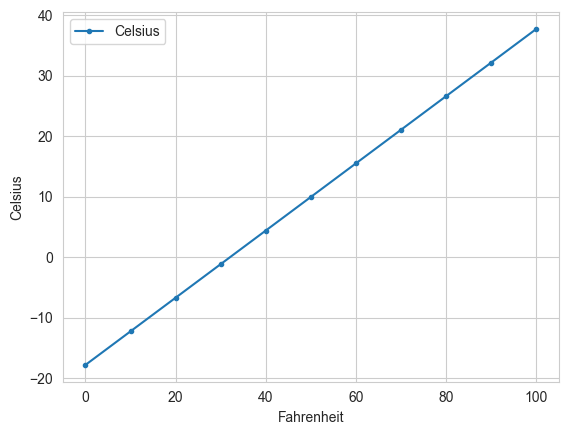

In [39]:
c = lambda f: 5 / 9* (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict Average High Temperature in NYC

### Section 1 - Data Acquisition

Upload the New York City average high temperatures for January into a dataframe.

In [40]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

Print the first 5 rows of the data.

In [41]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


Print the last 5 rows of the data.

In [42]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [43]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [44]:
nyc_df.Date.dtype

dtype('int64')

In [45]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

 Set the display precision to 2 decimal places and use describe to calculate basic descriptive statistics for the data.

In [46]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model


Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

In [47]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [48]:
linear_regression.slope

0.014771361132966163

In [49]:
linear_regression.intercept

8.694993233674289

### Section 6 - Predict the average high temperature for January 2024.


Using the model to predict the "average high temp in Jan" for the year 2024.

In [50]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations

A scatterplot of the average high January temperatures for New York City.

(10.0, 70.0)

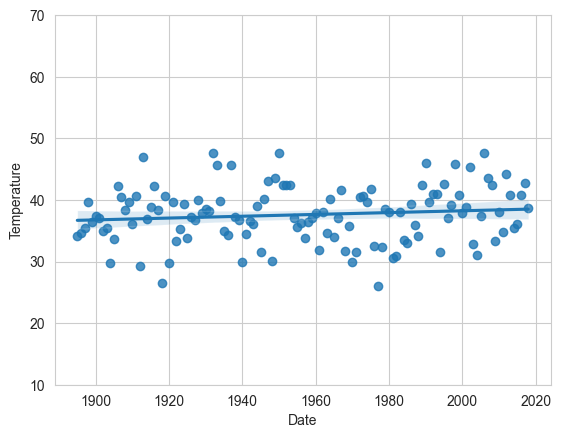

In [51]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

Use the test_train_split to split the data into parts for training and testing.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature, random_state=11)

X_train.shape


(93, 1)

In [53]:
X_test.shape

(31, 1)

Train the model using Linear Regression Fit. 

In [54]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [55]:
m = linear_regression.coef_
m

array([0.01939167])

In [56]:
b = linear_regression.intercept_
b

-0.30779820252656975

In [57]:
print(f'The linear regression equation is y = {m}x + {b}.') 

The linear regression equation is y = [0.01939167]x + -0.30779820252656975.


### Section 2 - Test the Model

Test the model using linear regression.

In [58]:
predicted = linear_regression.predict(X_test)
expected = y_test
predicted[:20]

array([37.85501484, 36.47820604, 37.93258153, 36.61394775, 36.74968946,
       38.68885679, 36.43942269, 37.13752293, 37.62231476, 37.5253564 ,
       37.00178122, 38.320415  , 37.19569795, 38.45615671, 36.55577273,
       37.25387297, 38.18467329, 37.89379819, 38.14588994, 38.63068177])

In [59]:
expected[:20]

73     31.7
2      35.5
77     40.5
9      29.8
16     40.7
116    34.8
0      34.2
36     38.2
61     36.2
56     42.5
29     39.4
97     40.9
39     39.8
104    40.8
6      37.0
42     45.7
90     33.0
75     29.9
88     38.0
113    42.4
Name: Temperature, dtype: float64

### Section 3 - Predict 

Using the model to predict the "average high temp in Jan" for the year 2024.

In [60]:
predict = (lambda x: m * x + b)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

Using a scatterplot to show the average high temperature for New York City.

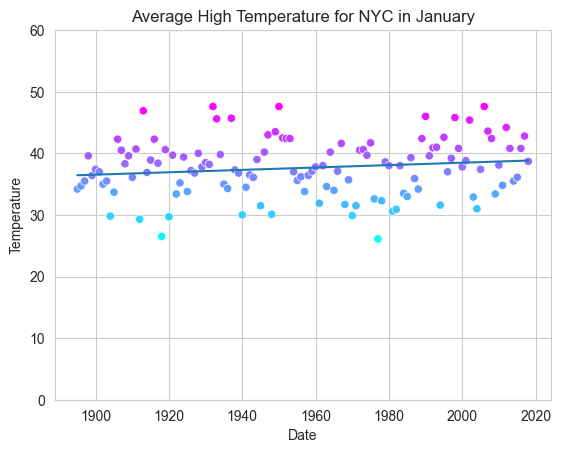

In [61]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='cool', legend=False)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
axes.set_title("Average High Temperature for NYC in January")
axes.set_ylim(0, 60)
line = plt.plot(x, y)


## Part 4 - Insights

Even though we used different methods, both came up with a scatterplot that shows a slowly rising average temperature for the month of January from the time person 1900-2020.  The first prediction is for a January 2024 average temperature of 38.59; the second prediction is for a January average temperature of 38.94.

While there is some variation between the predicted average temperatures between the two models, the results are still reasonable for either model as the differences in the predictions is only .35 degrees. By looking at these results, one can conclude that it may be helpful to use different models when making predictions, but the models should show the same trends.